In [1]:
from owlready2 import *

In [2]:
onto = get_ontology("file:////home/nab/Niklas/TEM-lactamase/CARD_Data_Ontologies/aro.owl").load()

In [3]:
from rdflib import Graph, Namespace, RDF, RDFS, OWL

g = Graph()
g.parse("/home/nab/Niklas/TEM-lactamase/CARD_Data_Ontologies/aro.owl")

# Define the namespaces
OWL_NS = Namespace("http://www.w3.org/2002/07/owl#")
RDF_NS = Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
RDFS_NS = Namespace("http://www.w3.org/2000/01/rdf-schema#")


for s, p, o in g.triples((None, RDF.type, OWL.ObjectProperty)):
    class_name = str(s)
    print(class_name)

for s, p, o in g.triples((None, RDFS.subClassOf, None)):
    subclass = str(s)
    superclass = str(o)

    print(f"{subclass} is a subclass of {superclass}")

http://purl.obolibrary.org/obo/RO_0002312
http://purl.obolibrary.org/obo/RO_0012006
http://purl.obolibrary.org/obo/RO_regulates
http://purl.obolibrary.org/obo/RO_#confers_resistance_to_antibiotic
http://purl.obolibrary.org/obo/RO_#confers_resistance_to_drug_class
http://purl.obolibrary.org/obo/RO_#derives_from
http://purl.obolibrary.org/obo/RO_#has_part
http://purl.obolibrary.org/obo/RO_#is_a
http://purl.obolibrary.org/obo/RO_#part_of
http://purl.obolibrary.org/obo/RO_#participates_in
http://purl.obolibrary.org/obo/RO_#targeted_by
http://purl.obolibrary.org/obo/RO_#targeted_by_antibiotic
http://purl.obolibrary.org/obo/ARO_0000000 is a subclass of http://purl.obolibrary.org/obo/ARO_1000003
http://purl.obolibrary.org/obo/ARO_0000001 is a subclass of http://purl.obolibrary.org/obo/ARO_1000003
http://purl.obolibrary.org/obo/ARO_0000016 is a subclass of http://purl.obolibrary.org/obo/ARO_1000003
http://purl.obolibrary.org/obo/ARO_0000017 is a subclass of http://purl.obolibrary.org/obo/ARO_1

In [4]:
from rdflib import Graph, Namespace, RDF, RDFS, OWL
from neo4j import GraphDatabase

# Function to import OWL data into Neo4j
def import_owl_to_neo4j(owl_file, neo4j_uri, neo4j_user, neo4j_password):
    # Load the OWL file
    g = Graph()
    g.parse(owl_file)

    # Define the namespaces
    OWL_NS = Namespace("http://www.w3.org/2002/07/owl#")
    RDF_NS = Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
    RDFS_NS = Namespace("http://www.w3.org/2000/01/rdf-schema#")
    
    # Connect to Neo4j
    driver = GraphDatabase.driver(neo4j_uri, auth=(neo4j_user, neo4j_password))
    
    with driver.session() as session:
        # Iterate over the classes in the OWL file
        for s, p, o in g.triples((None, RDF.type, OWL.Class)):
            class_name = str(s)
            session.run("CREATE (c:Class {name: $name})", name=class_name)
        
        # Iterate over the properties in the OWL file
        for s, p, o in g.triples((None, RDF.type, OWL.ObjectProperty)):
            property_name = str(s)
            session.run("CREATE (p:ObjectProperty {name: $name})", name=property_name)

        # Iterate over the instances in the OWL file
        for s, p, o in g.triples((None, RDF.type, OWL.NamedIndividual)):
            individual_name = str(s)
            session.run("CREATE (i:Individual {name: $name})", name=individual_name)

        # Create relationships (subclasses, properties)
        for s, p, o in g.triples((None, RDFS.subClassOf, None)):
            subclass = str(s)
            superclass = str(o)
            session.run("""
                MATCH (sub:Class {name: $subclass}), (super:Class {name: $superclass})
                CREATE (sub)-[:SUBCLASS_OF]->(super)
            """, subclass=subclass, superclass=superclass)

        for s, p, o in g.triples((None, RDFS.domain, None)):
            property_name = str(s)
            domain_class = str(o)
            session.run("""
                MATCH (p:ObjectProperty {name: $property_name}), (c:Class {name: $domain_class})
                CREATE (p)-[:HAS_DOMAIN]->(c)
            """, property_name=property_name, domain_class=domain_class)

        for s, p, o in g.triples((None, RDFS.range, None)):
            property_name = str(s)
            range_class = str(o)
            session.run("""
                MATCH (p:ObjectProperty {name: $property_name}), (c:Class {name: $range_class})
                CREATE (p)-[:HAS_RANGE]->(c)
            """, property_name=property_name, range_class=range_class)

    driver.close()
    print("Ontology imported successfully!")

# Example usage
import_owl_to_neo4j(
    owl_file="path/to/your/ontology.owl",
    neo4j_uri="bolt://localhost:7687",
    neo4j_user="neo4j",
    neo4j_password="your_password"
)


FileNotFoundError: [Errno 2] No such file or directory: '/home/nab/Niklas/path/to/your/ontology.owl'

In [ ]:
print(onto.search(is_a = onto.ARO_0000005))

AttributeError: 'NoneType' object has no attribute 'storid'

In [ ]:
for owl_class in onto.classes():
    print(f"Class: {owl_class.name}")
    
    # Get attributes and relationships at the class level
    data_properties, object_properties = get_properties(owl_class)

    # Display class-level attributes and relationships
    if data_properties:
        print(f"  Data Properties (attributes): {', '.join(data_properties)}")
    else:
        print("  Data Properties (attributes): None")
    
    if object_properties:
        print(f"  Object Properties (relationships): {', '.join(object_properties)}")
    else:
        print("  Object Properties (relationships): None")

    # Display instance-level attributes if available
    instances = list(owl_class.instances())
    if instances:
        print(f"  Instances of {owl_class.name}:")
        for instance in instances:
            print(f"    Instance: {instance.name}")
            instance_data_props, instance_obj_props = get_properties(instance)

            if instance_data_props:
                print(f"      Data Properties (attributes): {', '.join(instance_data_props)}")
            else:
                print("      Data Properties (attributes): None")

            if instance_obj_props:
                print(f"      Object Properties (relationships): {', '.join(instance_obj_props)}")
            else:
                print("      Object Properties (relationships): None")

    print("-" * 50)

Class: ARO_0000000


NameError: name 'get_properties' is not defined

In [ ]:
def print_class_hierarchy(onto_class, level=0):
    # Print the current class
    print("  " * level + onto_class.name)

    # Recurse for each subclass
    for subclass in onto_class.subclasses():
        print_class_hierarchy(subclass, level + 1)

# Print the hierarchy starting from the root class
print("Class hierarchy in the ontology:")
for root_class in onto.classes():
    # Only show the top-level classes (those with no parent in the ontology)
    if not list(root_class.is_a):
        print_class_hierarchy(root_class)



Class hierarchy in the ontology:


In [ ]:
from IPython.display import Image

# Render without viewing and display in Jupyter
onto.graph.render(filename="ontology_graph", format="png", view=False)
Image(filename="ontology_graph.png")


AttributeError: 'SubGraph' object has no attribute 'render'

In [ ]:
onto.save(file="ontology_graph.dot", format="rdfxml")  # "rdfxml" here is used to export the file format.

In [ ]:
import pydot
from IPython.display import Image

# Load the DOT file and convert it to PNG format
(graph,) = pydot.graph_from_dot_file("ontology_graph.dot")
graph.write_png("ontology_graph.png")

# Display the image in Jupyter Notebook
Image(filename="ontology_graph.png")

<?xml version="1.0"?>
^
Expected {'GRAPH' | 'DIGRAPH'}, found '<'  (at char 0), (line:1, col:1)


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
import rdflib
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

# Load and parse the ontology
ontology_file = "/home/nab/Niklas/TEM-lactamase/CARD_Data_Ontologies/aro.owl"  # Replace with the path to your ontology file
g = rdflib.Graph()
g.parse(ontology_file, format="xml")

# Initialize a directed graph in networkx
G = nx.DiGraph()

# Parse classes and relationships in the ontology
for s, p, o in g:
    # Add nodes and edges for ontology terms
    G.add_node(s, label=str(s).split("/")[-1])  # Use the fragment of the URI for labeling
    G.add_node(o, label=str(o).split("/")[-1])  # Target node as well
    G.add_edge(s, o, label=str(p).split("/")[-1])  # Add directed edge for relationships

# Plot the ontology structure
plt.figure(figsize=(12, 12))
pos = graphviz_layout(G, prog="dot")
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, "label"), node_size=3000, node_color="lightblue", font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

plt.title("Ontology Structure Visualization")
plt.show()


ImportError: requires pygraphviz http://pygraphviz.github.io/

<Figure size 1200x1200 with 0 Axes>

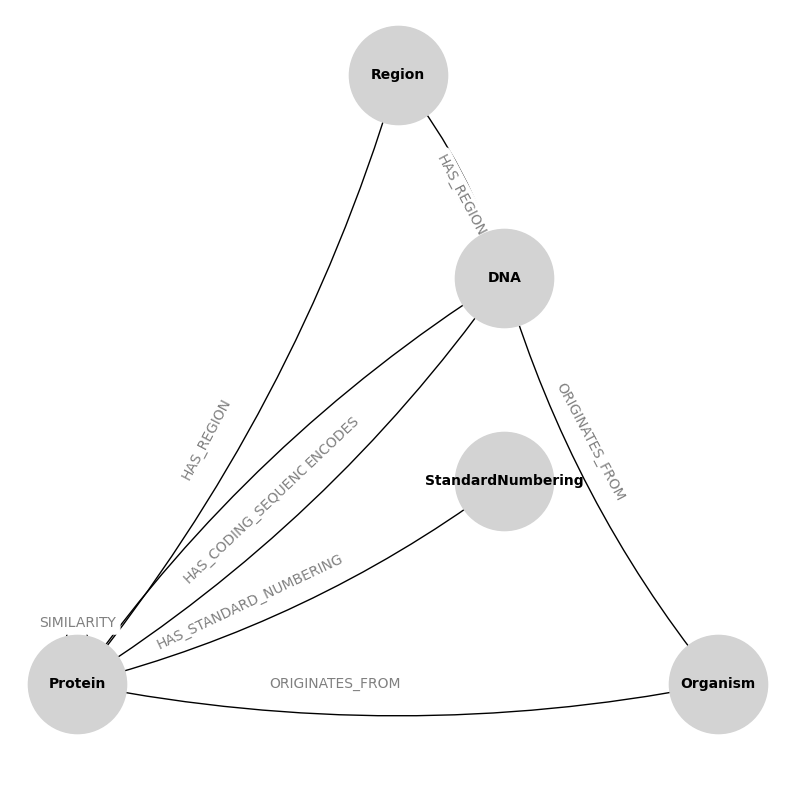

In [ ]:
from cgitb import text
from tkinter import font
from py2neo import Graph
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Connect to Neo4j (adjust connection details as necessary)
graph = Graph("bolt://localhost:7687", auth=("neo4j", "12345678"))

# Run the Cypher query to get schema information
query = """
MATCH (n)-[r]->(m)
RETURN DISTINCT labels(n) AS source_label, type(r) AS relationship, labels(m) AS target_label
"""
results = graph.run(query).data()

# Initialize a directed graph with NetworkX
G = nx.DiGraph()

# Process the results and add nodes and edges to the graph
for record in results:
    source_label = record['source_label'][0]  # Get the first label from the list
    target_label = record['target_label'][0]  # Get the first label from the list
    relationship = record['relationship']
    
    # Add nodes and edges to the NetworkX graph
    G.add_node(source_label, label=source_label)
    G.add_node(target_label, label=target_label)
    G.add_edge(source_label, target_label, relationship=relationship)

# Draw the graph
plt.figure(figsize=(10, 10))
# which layout: spring_layout, shell_layout, random_layout, circular_layout, kamada_kawai_layout, planar_layout, spectral_layout
pos = nx.planar_layout(G)
edge_labels = {(u, v): d['relationship'] for u, v, d in G.edges(data=True)}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", rotate=True)
# I want big arrow heads
nx.draw_networkx_edges(G, pos, connectionstyle="arc3,rad=0.1", edge_color="black", arrowsize=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="gray", label_pos=0.4, font_size=10)
nx.draw(G, pos, with_labels=True, node_color="lightgray", node_size=5000, font_size=10, font_weight="bold", edgelist=[])

# Save and show the plot
plt.savefig("neo4j_schema_visualization.png", format="PNG")
plt.show()
